In [190]:
from urllib.request import urlopen
from matplotlib import pyplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

# If we are using PyCharm dark mode, the image will be inverted unless we do this
pyplot.style.use('dark_background')

In [191]:
data = pd.read_csv('California_Egg_Data.csv')
image_urls = data['IMAGE URL']

In [192]:
req = urlopen(image_urls[2100])

In [193]:
image = np.asarray(bytearray(req.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [194]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

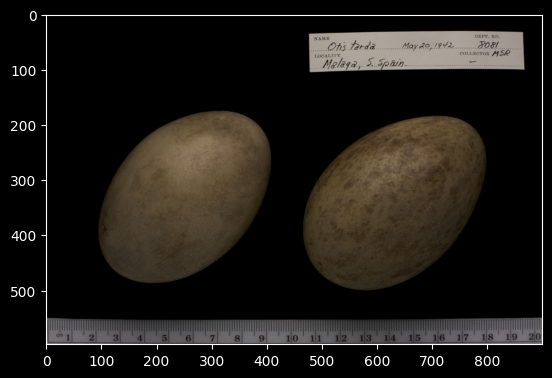

In [195]:
plt.imshow(image)

In [197]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

https://learnopencv.com/contour-detection-using-opencv-python-c/
opencv code for threshold and for finding contours
Hyper-parameters could probably use some tweaking, but for now these values always get the eggs and exclude most text

In [248]:
ret, thresh = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY)

contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 69, 168,  74],
        ...,
        [ 68, 161,  74],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

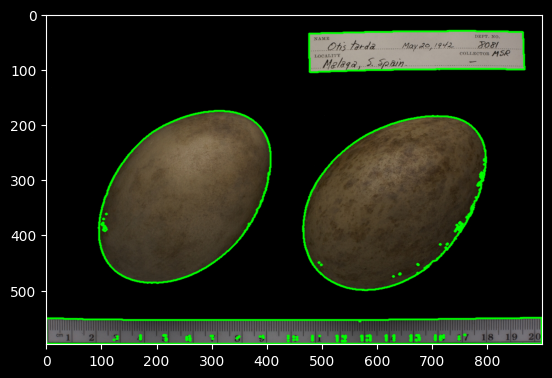

In [249]:
plt.imshow(image_copy1)

https://www.geeksforgeeks.org/find-circles-and-ellipses-in-an-image-using-opencv-python/
Blob detection to find just the eggs and not the text or the rectangle for the notes

In [253]:
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 50

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.2

# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

In [254]:
# Detect blobs
keypoints = detector.detect(image_copy1)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (255, 0, 0),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

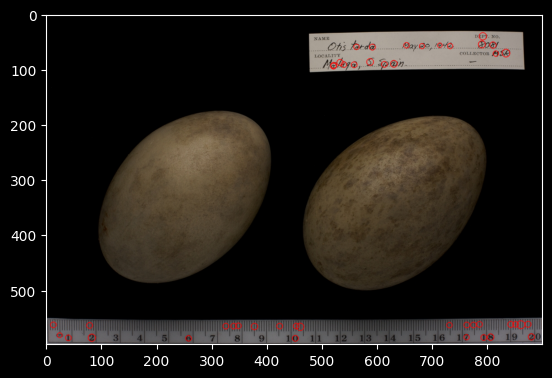

In [255]:
plt.imshow(blobs)